# Image reconstruction by autoencoder

In [1]:
import os

import tensorflow as tf
import helpers as helpers
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import numpy as np
!pwd

%cd ..
%ls
!source set_env.sh
%cd scripts

print(os.environ['DATA'])

Using TensorFlow backend.


/Users/nabarundev/Anomaly-Detection-for-ECAL-DQM/scripts
/Users/nabarundev/Anomaly-Detection-for-ECAL-DQM
#set_env.sh#           logs/                  set_env.sh
README.md              loss_lists/            set_env_preprocess.sh
data/                  models/                supervised_learning/
data_maxnorm/          plots/                 test2/
data_nopreprocess/     scripts/
setting some environment variables
/Users/nabarundev/Anomaly-Detection-for-ECAL-DQM/scripts
/Users/nabarundev/Anomaly-Detection-for-ECAL-DQM/data/good_2016


## Look at a good input image and then its reconstruction
Load a good input image and plot it. These are ECAL Barrel rechit occupancy images.

[[ 0.25531915  0.38297874  0.40425533  0.29787233]
 [ 0.29787233  0.27659574  0.36170211  0.25531915]
 [ 0.27659574  0.27659574  0.19148937  0.29787233]
 [ 0.21276596  0.25531915  0.25531915  0.42553192]]
Shape of image is:  (170, 360)


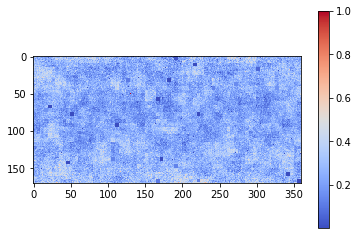

In [6]:
data_sample=helpers.get_data("ECAL_rechit_occ_time_276582.hdf5",data_type='good_2016')
input_image=data_sample[150,:]
print(input_image[1:5,1:5])
print("Shape of image is: ",input_image.shape)
im=plt.imshow(input_image,cmap=cm.coolwarm)
plt.colorbar()
plt.show()
plt.clf()
input_image=np.reshape(input_image,(1,1,input_image.shape[0],input_image.shape[1]))


The above is what a good input image looks like. Now load a trained autoencoder model and plot its reconstruction.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 170, 360)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 170, 360)       104       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 4, 170, 360)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 34, 72)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 34, 72)         390       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 6, 34, 72)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 17, 36)         0         
__________

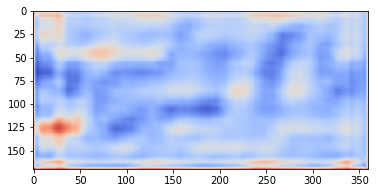

In [4]:
import keras.models as models
model_name='autoencoder_v6_binary_crossentropy_adam'
trained_model=models.load_model(os.environ['BASEDIR']+"/models/trial_models_dump/"+model_name+".h5")
trained_model.summary()
reconstructed_image=trained_model.predict(input_image)
reconstructed_image=np.reshape(reconstructed_image,(input_image.shape[2],input_image.shape[3]))
im=plt.imshow(reconstructed_image,cmap=cm.coolwarm)
plt.show()

In [89]:
layer_dict = dict([(layer.name, layer) for layer in trained_model.layers])
weights_1=layer_dict['conv2d_8'].get_weights()
weight_array=np.array(weights_1)
print(weight_array.shape)
print(weight_array[0])

(2,)
[[[[-0.06311926  0.08685415 -0.12968397  0.11707803]
   [-0.11558821 -0.01738844 -0.12546921 -0.0385318 ]
   [-0.11846109 -0.07779056 -0.00809278  0.15037221]
   [ 0.04284379 -0.01546933 -0.01991556 -0.08968665]
   [ 0.06582666 -0.07539374  0.10089292  0.13540936]
   [ 0.11422753  0.04299398 -0.14553045  0.10879602]]

  [[ 0.15330724 -0.0930215   0.00802668 -0.02610369]
   [ 0.05329371 -0.02209567 -0.14958207 -0.09859822]
   [ 0.04678817 -0.08650468  0.0098128  -0.06340018]
   [-0.18467055 -0.15648955  0.02840573  0.09563897]
   [ 0.05691393  0.06486914  0.00510687  0.01428771]
   [ 0.05129303  0.02374253  0.05808694 -0.06397256]]

  [[ 0.15791664  0.14999531  0.08188208 -0.08447657]
   [-0.1149905   0.06841885 -0.0026674  -0.09787792]
   [ 0.10864241  0.07163878 -0.05256034 -0.00500774]
   [-0.16115475 -0.1483089  -0.12794273  0.04751229]
   [ 0.08984702  0.05931585  0.04356043  0.12360135]
   [ 0.18232478  0.04033636 -0.04349138 -0.19204402]]

  [[ 0.11170357  0.15330552  0.1126

The reconstructed image looks like above. It is expected that is blurred as above. The autoencoder trained is undercomplete and reconstructs the image back from a lower dimensional representation (over latent varaibles.). It is expected to capture the important features of the images. 



Moving on, training and testing loss spectrums look as follows. 

In [90]:
from IPython.display import Image,display
#display(Image(filename=os.environ['BASEDIR']+"/plots/trial_models_dump/loss_as_metric/"+model_name.replace("best_model","autoencoder")+"_train.png") )
#display(Image(filename=os.environ['BASEDIR']+"/plots/trial_models_dump/loss_as_metric/"+model_name.replace("best_model","autoencoder")+"_test.png") )

Testing and traing loss spectrum are similar. Seems to generalize well as far as reconstructing images are concerned. But thats not exactly what we are trying to do.

## Let us see what happens with bad data.
First, lets look at some artificial (bad) data with hot towers.

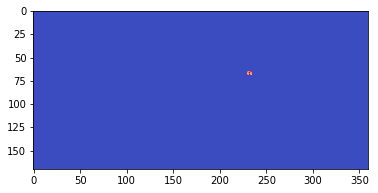

In [91]:
data_sample=helpers.get_data("ECAL_rechit_occ_time_276582.hdf5",data_type='bad_2016/hot_towers')
input_image=data_sample[0,:]
im=plt.imshow(input_image,cmap=cm.coolwarm)
plt.show()
plt.clf()
input_image=np.reshape(input_image,(1,1,input_image.shape[0],input_image.shape[1]))


Now let us look at its reconstruction.

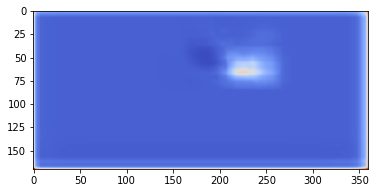

In [92]:
reconstructed_image=trained_model.predict(input_image)
reconstructed_image=np.reshape(reconstructed_image,(input_image.shape[2],input_image.shape[3]))
im=plt.imshow(reconstructed_image,cmap=cm.coolwarm)
plt.show()


In [93]:
#display(Image(filename=os.environ['BASEDIR']+"/plots/trial_models_dump/train_val_losses/"+model_name.replace("autoencoder_","").replace("best_model_","").replace("model_","")+"_loglog_training_loss_v_batch.png"))
#display(Image(filename=os.environ['BASEDIR']+"/plots/trial_models_dump/train_val_losses/"+model_name.replace("autoencoder_","").replace("best_model_","").replace("model_","")+"_training_loss_v_batch.png"))
#display(Image(filename=os.environ['BASEDIR']+"/plots/trial_models_dump/train_val_losses/"+model_name.replace("autoencoder_","").replace("best_model_","").replace("model_","")+"_training_loss_v_epoch.png"))
#display(Image(filename=os.environ['BASEDIR']+"/plots/trial_models_dump/train_val_losses/"+model_name.replace("autoencoder_","").replace("best_model_","").replace("model_","")+"_validation_loss_v_epoch.png"))


Hmmmm.., now lets see how the loss spectrum over several such images (these images were manufactured using randomly picked good images and making a tower hot and then renormalizing) look like compared to loss spectrum of good test images.

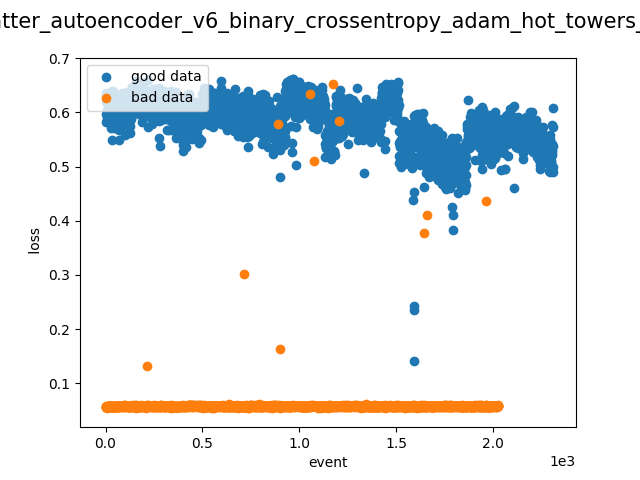

In [94]:
display(Image(filename=os.environ['BASEDIR']+"/plots/trial_models_dump/loss_as_metric/scatter_"+model_name+"_hot_towers_test.png") )

The reconstructed loss spectrums are different. Roc(TP_vs_FP)_AUC is >0.99. 

Next look at a different type of (artificial) bad data, images with missing modules. Such an image is shown below.

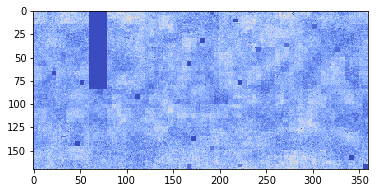

In [95]:
data_sample=helpers.get_data("ECAL_rechit_occ_time_276582.hdf5",data_type='bad_2016/missing_modules')
input_image=data_sample[0,:]
im=plt.imshow(input_image,cmap=cm.coolwarm)
plt.show()
plt.clf()
input_image=np.reshape(input_image,(1,1,input_image.shape[0],input_image.shape[1]))


Now look at its reconstruction.

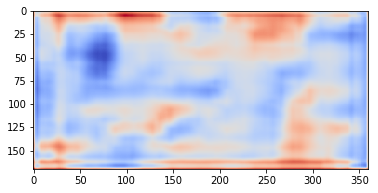

In [96]:
reconstructed_image=trained_model.predict(input_image)
reconstructed_image=np.reshape(reconstructed_image,(input_image.shape[2],input_image.shape[3]))
im=plt.imshow(reconstructed_image,cmap=cm.coolwarm)
plt.show()


Lets look at the loss spectrum compared to loss spectrum of test images, just like before.

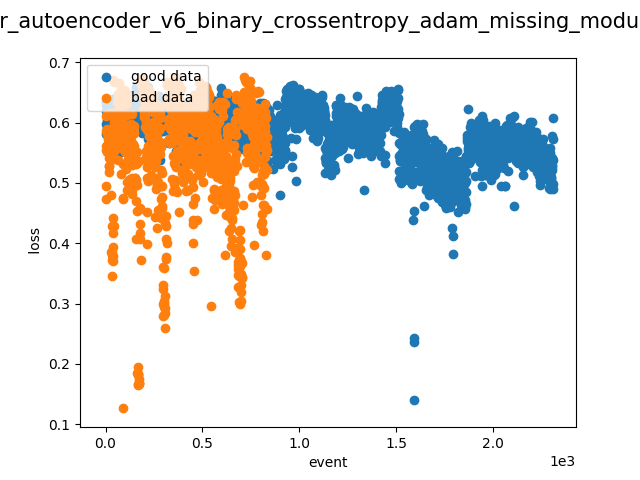

In [97]:
display(Image(filename=os.environ['BASEDIR']+"/plots/trial_models_dump/loss_as_metric/scatter_"+model_name+"_missing_modules_test.png") )

This obviously doesn't work well....... Technique needs to be improved a lot more. The reconstruction appears to blur out the edges of the missing module but overall does a similar job as when reconstructing good images. We need better prepocessing techniques and more sopisticated models...?